### 1. Conectar ao banco e desenvolver as querys para obter os dados

#### Fazendo Download do zip

In [1]:
from urllib import request
file_url = 'https://s3.amazonaws.com/gerencianet-pub-prod-1/printscreen/2021/desafio-tecnico.zip'
file = 'desafio-tecnico.zip'
request.urlretrieve(file_url , file )

('desafio-tecnico.zip', <http.client.HTTPMessage at 0x1bb2b8b4e50>)

#### Extraindo o zip

In [2]:
from zipfile import ZipFile
z = ZipFile(file, 'r')
z.extractall()
z.close()

#### Importando os dados do SQLite

In [3]:
import sqlite3
import pandas as pd
import numpy as np
con = sqlite3.connect("desafio-tecnico.db")

#### Função para trasformar tabelas SQLite em DataFrame pandas

In [4]:
def parse_to_df(table,database):
    con = sqlite3.connect(database)
    query = ''' SELECT * FROM '''+table
    df = pd.read_sql_query(query, con)
    return df

#### Transformar Tabela accounts em dataframe df_accounts

In [5]:
df_accounts = parse_to_df('accounts',"desafio-tecnico.db")

In [6]:
df_accounts.head()

,id,account_number,birth,occupation,email,address_id,created_at
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00


#### Transformar Tabela address em dataframe df_address

In [7]:
df_address = parse_to_df('address','desafio-tecnico.db')
df_address.head()

,id,state,city,created_at
0,1,RJ,Carmo,2021-04-01 02:30:00
1,2,MG,Bertopolis,2021-04-01 02:00:00
2,3,MG,Olaria,2021-04-01 11:30:00
3,4,PR,Icaraima,2021-04-01 14:30:00
4,5,ES,Ecoporanga,2021-04-02 15:30:00


#### Transformar Tabela levels em dataframe df_levels

In [8]:
df_levels = parse_to_df('levels','desafio-tecnico.db')
df_levels.head()

,id,account_number,level,created_at
0,1,155938,F,2021-04-20 08:00:00
1,2,747007,D,2021-04-19 19:30:00
2,4,66402,D,2021-04-28 21:00:00
3,5,277012,D,2021-04-19 12:00:00
4,6,228213,D,2021-04-26 15:00:00


In [9]:
df_levels.level.unique()

array(['F', 'D', 'C', 'A', 'B'], dtype=object)

In [10]:
df_levels.account_number.nunique()

926

#### Transformar Tabela charges em dataframe df_charges

In [11]:
df_charges = parse_to_df('charges','desafio-tecnico.db')
df_charges.head()

,id,account_number,status,value,created_at
0,1,155938,paid,11992,2021-04-01 03:00:00
1,2,155938,paid,9689,2021-04-01 13:30:00
2,3,155938,paid,11579,2021-04-01 11:30:00
3,4,747007,unpaid,3134,2021-04-02 12:00:00
4,5,747007,paid,3085,2021-04-02 19:00:00


#### Transformar Tabela transactions em dataframe df_transactions

In [12]:
df_transactions = parse_to_df('transactions','desafio-tecnico.db')
df_transactions.head()

,id,account_number,transaction_type_id,value,created_at
0,1,155938,1,11992,2021-04-01 03:00:00
1,2,155938,1,9689,2021-04-01 13:30:00
2,3,155938,1,11579,2021-04-01 11:30:00
3,4,155938,3,11168,2021-04-01 11:00:00
4,5,155938,3,10772,2021-04-01 21:00:00


#### Transformar Tabela df_transaction_type em dataframe df_df_transaction_type

In [13]:
df_transaction_type = parse_to_df('transaction_type','desafio-tecnico.db')
df_transaction_type.head()

,id,description,description_long
0,1,boleto_recebido,BOLETO RECEBIDO PELO CLIENTE
1,2,pix_enviado,PIX ENVIADO PELO CLIENTE PARA UMA CONTA EXTERNA
2,3,pix_recebido,PIX RECEBIDO PELO CLIENTE


- #### Juntando tabela de contas com os endereços

In [14]:
df_address['address_id'] = df_address['id']
df_accounts_with_address = pd.merge(df_accounts, df_address, how='left', on='address_id')
df_accounts_with_address.shape

(1029, 11)

- ##### Renomeando colunas para melhor compreenção

In [15]:
df_accounts_with_address.rename(columns={'id_x':'id_acc','id_y':'id_add','created_at_x':'created_at_acc'},inplace=True)

In [16]:
df_accounts_with_address.drop(columns=['created_at_y'], inplace=True)

In [17]:
df_accounts_with_address.head()

,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00,1,RJ,Carmo
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00,2,MG,Bertopolis
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00,3,MG,Olaria
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00,4,PR,Icaraima
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00,5,ES,Ecoporanga


#### Juntar Tabela de contas/endereço com a Tabela de levels

In [18]:
df_accounts_with_address_levels = pd.merge(df_accounts_with_address, df_levels, how='left', on='account_number')
df_accounts_with_address_levels.shape

(1029, 13)

In [19]:
df_accounts_with_address_levels.drop(columns=['created_at'],inplace=True)
df_accounts_with_address_levels

,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city,id,level
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00,1,RJ,Carmo,1.0,F
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00,2,MG,Bertopolis,2.0,D
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00,3,MG,Olaria,NaN,NaN
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00,4,PR,Icaraima,4.0,D
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00,5,ES,Ecoporanga,5.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1025,385922,2003-05-20,Analista,evelynviana3@example.com,745,2021-07-10 03:30:00,745,GO,Monte Alegre de Goias,1025.0,D
1025,1026,37393,1996-01-20,Investidor,anaclaraporto9@example.com,505,2021-07-10 04:30:00,505,PR,Paraiso do Norte,1026.0,C
1026,1027,714025,1981-07-21,Corretor,miguelribeiro3@example.com,746,2021-07-10 15:00:00,746,GO,Sao Luis de Montes Belos,1027.0,D
1027,1028,708615,1967-03-14,Corretor,mariaeduardadarocha@example.com,747,2021-07-10 21:30:00,747,SC,Zortea,1028.0,D


#### Inserindo a informação de charges:
- #### criação de variavel paid (Contem a qtd de boletos que foram pagos) 
- #### e unpaid (Contém a qtd de boletos não pagos)

In [20]:
df_charges_group = df_charges.groupby(['account_number','status']).count().reset_index()[['account_number','status','value']]
df_charges_group = df_charges_group.pivot(index="account_number", columns="status", values="value").reset_index().fillna(0)
df_charges_group

status,account_number,paid,unpaid
0,2711,144.0,75.0
1,2763,128.0,95.0
2,2957,32.0,30.0
3,3478,18.0,18.0
4,5561,26.0,40.0
...,...,...,...
875,995447,136.0,138.0
876,997838,23.0,70.0
877,998364,110.0,25.0
878,998440,25.0,19.0


- ##### Juntando atraves de join a informação de df_charges_group com df_accounts_with_address_levels

In [21]:
df_accounts_with_address_levels_charges = pd.merge(df_accounts_with_address_levels, df_charges_group, how='left', on='account_number')
print(df_accounts_with_address_levels_charges.shape)
df_accounts_with_address_levels_charges.head()

(1029, 14)


,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city,id,level,paid,unpaid
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00,1,RJ,Carmo,1.0,F,30.0,39.0
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00,2,MG,Bertopolis,2.0,D,113.0,153.0
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00,3,MG,Olaria,NaN,NaN,64.0,79.0
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00,4,PR,Icaraima,4.0,D,184.0,33.0
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00,5,ES,Ecoporanga,5.0,D,90.0,112.0


- ##### Preenchendo os NaN de paid e unpaid com 0.

In [22]:
df_accounts_with_address_levels_charges[['paid','unpaid']].info()
print(f"-"*40)
print(f":::> Quantidade de NaN em paid e unpaid")
df_accounts_with_address_levels_charges[['paid','unpaid']].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1028
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   paid    880 non-null    float64
 1   unpaid  880 non-null    float64
dtypes: float64(2)
memory usage: 24.1 KB
----------------------------------------
:::> Quantidade de NaN em paid e unpaid


paid      149
unpaid    149
dtype: int64

- ##### Preenchendo os NaN de charger com 0

In [23]:
df_accounts_with_address_levels_charges['paid'].fillna(0, inplace=True)
df_accounts_with_address_levels_charges['unpaid'].fillna(0, inplace=True)

- ##### Convertendo as colunas paid e unpaid em inteiro

In [24]:
df_accounts_with_address_levels_charges['paid'] = df_accounts_with_address_levels_charges['paid'].astype(int)
df_accounts_with_address_levels_charges['unpaid'] = df_accounts_with_address_levels_charges['unpaid'].astype(int)

In [25]:
df_accounts_with_address_levels_charges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1028
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_acc          1029 non-null   int64  
 1   account_number  1029 non-null   int64  
 2   birth           1029 non-null   object 
 3   occupation      1029 non-null   object 
 4   email           1029 non-null   object 
 5   address_id      1029 non-null   int64  
 6   created_at_acc  1029 non-null   object 
 7   id_add          1029 non-null   int64  
 8   state           1029 non-null   object 
 9   city            1029 non-null   object 
 10  id              926 non-null    float64
 11  level           926 non-null    object 
 12  paid            1029 non-null   int32  
 13  unpaid          1029 non-null   int32  
dtypes: float64(1), int32(2), int64(4), object(7)
memory usage: 112.5+ KB


#### Inserindo informação de level para uma nova variavel como sendo licita (0) ou ilicita (1), sendo A,B,C e D = licita e F = ilicita

In [26]:
df_accounts_with_address_levels_charges['target'] = df_accounts_with_address_levels_charges['level'].map({'A':0,'B':0,'C':0,'D':0,'F':1}, na_action='ignore')

##### Convertendo account_number para object

In [27]:
df_accounts_with_address_levels_charges['account_number'] = df_accounts_with_address_levels_charges['account_number'].astype(str)

In [28]:
#### Deletando variaveis e Dataframes que não estão sendo usado
del df_accounts, df_accounts_with_address, df_accounts_with_address_levels, df_address, df_charges, df_charges_group,df_levels
del df_transaction_type, df_transactions

In [29]:
#dir()

### 2. Descritiva do Dataset com os merges(join)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df_accounts_with_address_levels_charges.describe()

,id_acc,address_id,id_add,id,paid,unpaid,target
count,1029.000000,1029.000000,1029.000000,926.000000,1029.000000,1029.000000,926.000000
mean,515.000000,340.163265,340.163265,518.062635,94.059281,56.056365,0.220302
std,297.191016,213.681298,213.681298,297.499508,99.035757,58.770052,0.414674
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,258.000000,148.000000,148.000000,259.250000,20.000000,20.000000,0.000000
50%,515.000000,328.000000,328.000000,522.500000,78.000000,42.000000,0.000000
75%,772.000000,518.000000,518.000000,772.750000,134.000000,77.000000,0.000000
max,1029.000000,747.000000,747.000000,1029.000000,764.000000,534.000000,1.000000


In [32]:
df_accounts_with_address_levels_charges.tail()

,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city,id,level,paid,unpaid,target
1024,1025,385922,2003-05-20,Analista,evelynviana3@example.com,745,2021-07-10 03:30:00,745,GO,Monte Alegre de Goias,1025.0,D,0,0,0.0
1025,1026,37393,1996-01-20,Investidor,anaclaraporto9@example.com,505,2021-07-10 04:30:00,505,PR,Paraiso do Norte,1026.0,C,0,0,0.0
1026,1027,714025,1981-07-21,Corretor,miguelribeiro3@example.com,746,2021-07-10 15:00:00,746,GO,Sao Luis de Montes Belos,1027.0,D,0,0,0.0
1027,1028,708615,1967-03-14,Corretor,mariaeduardadarocha@example.com,747,2021-07-10 21:30:00,747,SC,Zortea,1028.0,D,0,0,0.0
1028,1029,418641,1992-06-10,Corretor,heitordaluz@example.com,12,2021-07-10 02:00:00,12,RJ,Italva,1029.0,F,1,0,1.0


- ##### Visualizando boletos pagos e não pagos por estado

In [33]:
df_paid_unpaid_to_state = df_accounts_with_address_levels_charges.groupby(['state']).sum().reset_index()[['state','paid','unpaid']]
df_paid_unpaid_to_state

,state,paid,unpaid
0,BA,5311,2508
1,ES,11736,7234
2,GO,4801,2635
3,MG,33597,19057
4,PR,14903,11264
5,RJ,14503,9824
6,SC,6170,2403
7,SP,5766,2757


In [34]:
data_plot = df_paid_unpaid_to_state[['state','unpaid']].sort_values('unpaid',ascending=False)

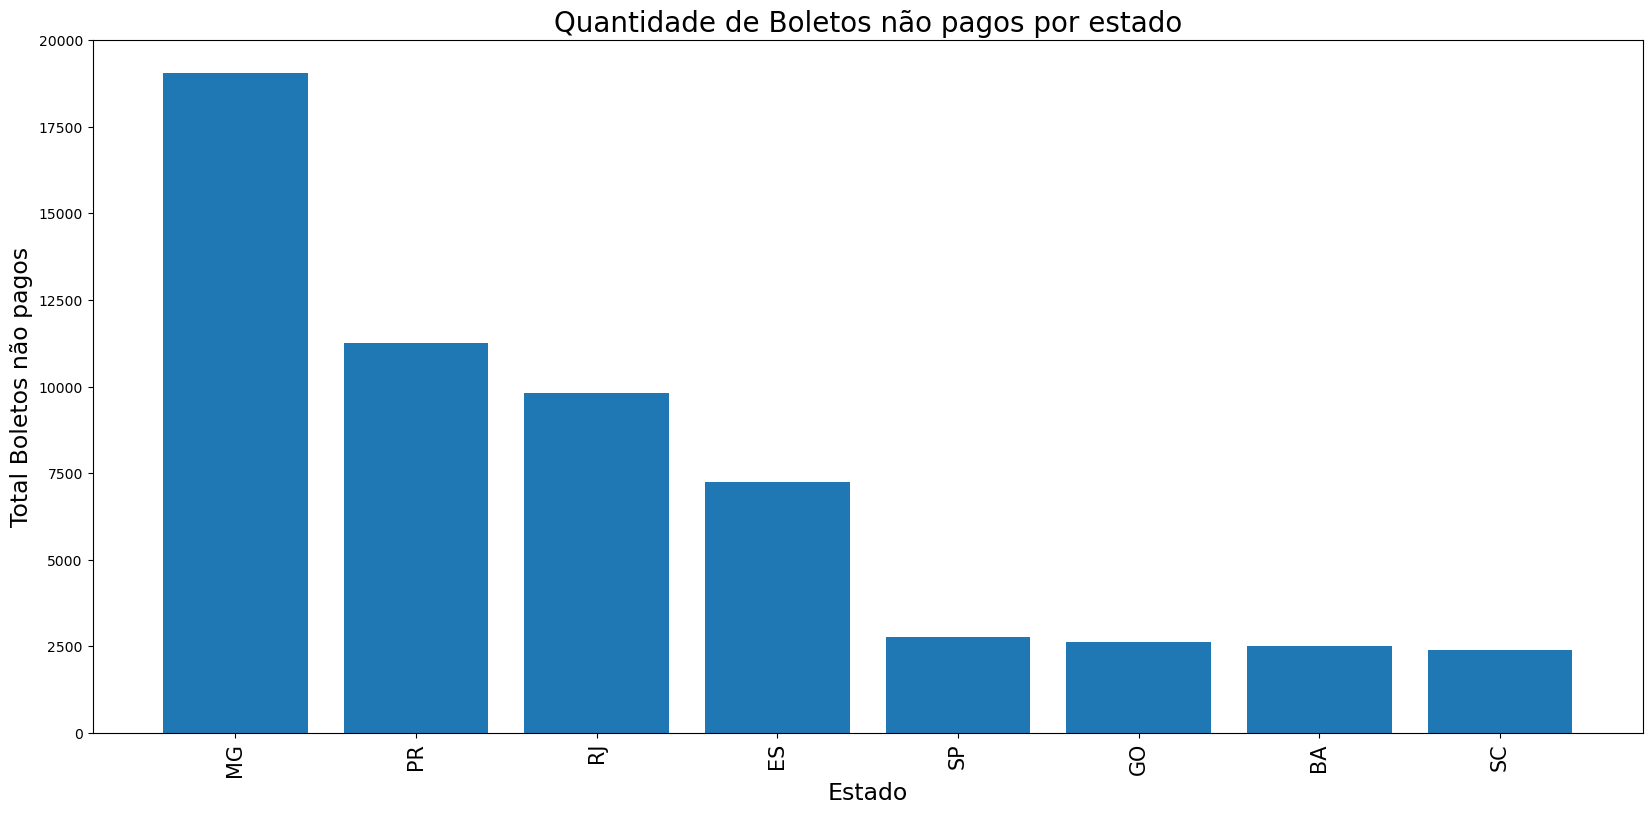

In [35]:
f,ax = plt.subplots(figsize=(20,9))

data_plot = df_paid_unpaid_to_state[['state','unpaid']].sort_values('unpaid',ascending=False)

ax.bar(data_plot['state'],data_plot['unpaid'])
ax.set_xticklabels(data_plot['state'].values,rotation=90,fontsize='15')
ax.set_xlabel('Estado',fontsize='17')
ax.set_ylabel('Total Boletos não pagos',fontsize='17')
ax.set_title('Quantidade de Boletos não pagos por estado',fontsize='20')
plt.show()

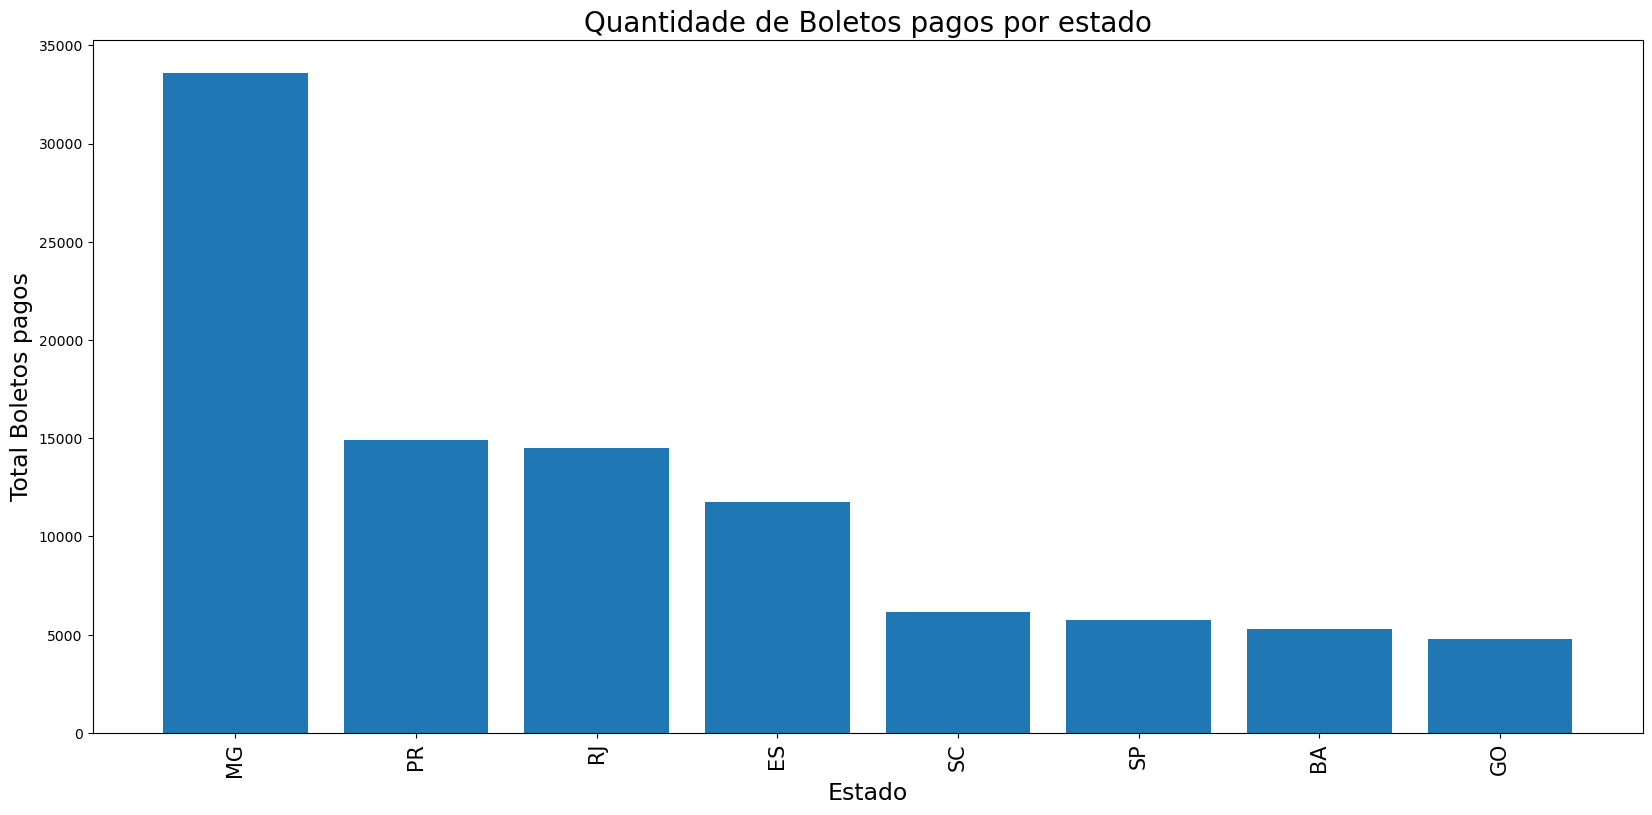

In [36]:
f,ax = plt.subplots(figsize=(20,9))

data_plot = df_paid_unpaid_to_state[['state','paid']].sort_values('paid',ascending=False)

ax.bar(data_plot['state'],data_plot['paid'])
ax.set_xticklabels(data_plot['state'].values,rotation=90,fontsize='15')
ax.set_xlabel('Estado',fontsize='17')
ax.set_ylabel('Total Boletos pagos',fontsize='17')
ax.set_title('Quantidade de Boletos pagos por estado',fontsize='20')
plt.show()

- ##### Vizualizando as contas que tem mais boletos não pagos

In [37]:
acc_largest_unpaid = df_accounts_with_address_levels_charges[['account_number','state','unpaid']].groupby(['account_number','state']).sum().reset_index()
acc_largest_unpaid.nlargest(10,'unpaid')

,account_number,state,unpaid
153,253345,MG,534
355,422360,MG,463
116,221895,MG,437
220,309054,RJ,385
275,355091,ES,356
630,662383,RJ,352
230,317265,RJ,313
912,911353,PR,313
60,164397,MG,305
746,76284,MG,291


#### OBS: Vemos que dentre as 10 contas que mais tem boletos não pagos 50% são de MG confirmando o mesmo como estado de maior inadimplencia

- ##### Copia de segurança do dataframe

In [38]:
df = df_accounts_with_address_levels_charges.copy()

In [39]:
df = df_accounts_with_address_levels_charges.drop(columns=['id_acc','address_id','id_add','id','level','birth','email','created_at_acc'])

In [40]:
# Dados com Classificação levels
df_train = df.loc[df['target'].notna()]
# Dados sem classificação levels
df_test = df.loc[df['target'].isna()].drop(columns=['target'])

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 1028
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_number  926 non-null    object 
 1   occupation      926 non-null    object 
 2   state           926 non-null    object 
 3   city            926 non-null    object 
 4   paid            926 non-null    int32  
 5   unpaid          926 non-null    int32  
 6   target          926 non-null    float64
dtypes: float64(1), int32(2), object(4)
memory usage: 50.6+ KB


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 2 to 1010
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   account_number  103 non-null    object
 1   occupation      103 non-null    object
 2   state           103 non-null    object
 3   city            103 non-null    object
 4   paid            103 non-null    int32 
 5   unpaid          103 non-null    int32 
dtypes: int32(2), object(4)
memory usage: 4.8+ KB


### 3. Desenvolvimento do modelo para classificar as contas em lícitas (0) ou ilícitas (1) utilizando pycaret AutoML com metrica de accuracia e observando a precisão junto com ROC para evitar overfit

- #### Utilizando AutoML com pycarat, Treinar, testar, ajustar, avaliar e tunar

In [43]:
#!pip install --user PyQt5

In [44]:
#!pip install --pre pycaret

In [45]:
from pycaret.classification import *

In [46]:
s = setup(data = df_train, target = 'target')

,Description,Value
0,Session id,3528
1,Target,target
2,Target type,Binary
3,Original data shape,"(926, 7)"
4,Transformed data shape,"(926, 6)"
5,Transformed train set shape,"(648, 6)"
6,Transformed test set shape,"(278, 6)"
7,Numeric features,2
8,Categorical features,4
9,Preprocess,True


In [47]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9042,0.9477,0.7357,0.8328,0.7763,0.7160,0.7216,0.0950
nb,Naive Bayes,0.9028,0.9479,0.8267,0.7644,0.7894,0.7268,0.7315,0.0420
qda,Quadratic Discriminant Analysis,0.8981,0.9473,0.7914,0.7619,0.7730,0.7076,0.7104,0.0410
lr,Logistic Regression,0.8904,0.9494,0.6648,0.8251,0.7248,0.6584,0.6714,0.9400
knn,K Neighbors Classifier,0.8874,0.9065,0.6786,0.7969,0.7279,0.6576,0.6646,0.0540
et,Extra Trees Classifier,0.8781,0.9291,0.5319,0.8706,0.6582,0.5894,0.6170,0.0890
lda,Linear Discriminant Analysis,0.8689,0.9230,0.6167,0.7537,0.6750,0.5943,0.6010,0.0410
ridge,Ridge Classifier,0.8688,0.0000,0.5810,0.7857,0.6626,0.5837,0.5971,0.0290
dt,Decision Tree Classifier,0.8578,0.8082,0.7195,0.6905,0.6968,0.6063,0.6117,0.0390
lightgbm,Light Gradient Boosting Machine,0.8100,0.9125,0.4490,0.6193,0.5166,0.4020,0.4126,0.2230


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [48]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=3528, verbose=0, warm_start=False)

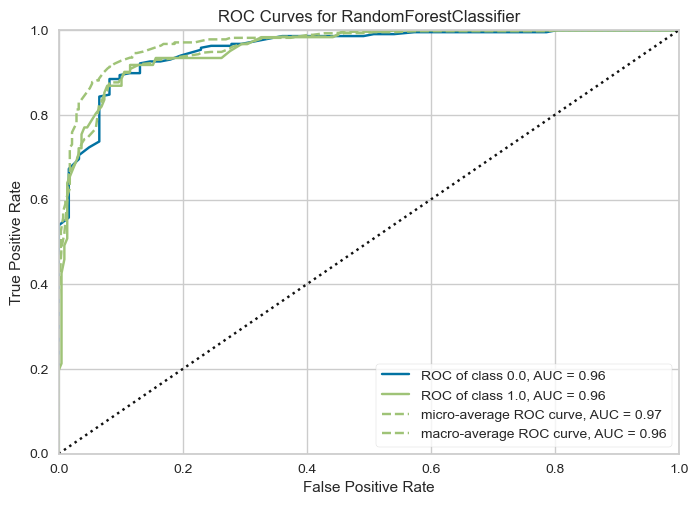

In [49]:
plot_model(best)

In [50]:
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()

In [51]:
exp1.setup(df_train, target = 'target')

,Description,Value
0,Session id,249
1,Target,target
2,Target type,Binary
3,Original data shape,"(926, 7)"
4,Transformed data shape,"(926, 6)"
5,Transformed train set shape,"(648, 6)"
6,Transformed test set shape,"(278, 6)"
7,Numeric features,2
8,Categorical features,4
9,Preprocess,True


In [52]:
#dir(exp1)

- ##### Teste de Experimentação para ver se o modelo rf realmente é o melhor

In [53]:
exp1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9106,0.9422,0.7362,0.8505,0.7810,0.7260,0.7343,0.1020
qda,Quadratic Discriminant Analysis,0.8843,0.9385,0.8067,0.7169,0.7544,0.6795,0.6854,0.0390
lr,Logistic Regression,0.8781,0.9464,0.6386,0.7898,0.6940,0.6202,0.6330,0.2160
et,Extra Trees Classifier,0.8781,0.9211,0.4976,0.9290,0.6365,0.5730,0.6189,0.0920
knn,K Neighbors Classifier,0.8766,0.9014,0.6924,0.7418,0.7121,0.6341,0.6377,0.0600
nb,Naive Bayes,0.8765,0.9355,0.7776,0.7050,0.7350,0.6554,0.6601,0.0410
ridge,Ridge Classifier,0.8719,0.0000,0.6038,0.7925,0.6731,0.5966,0.6127,0.0290
lda,Linear Discriminant Analysis,0.8626,0.9234,0.6538,0.7319,0.6753,0.5904,0.6022,0.0400
lightgbm,Light Gradient Boosting Machine,0.8471,0.9223,0.5333,0.7289,0.6047,0.5142,0.5302,0.0490
ada,Ada Boost Classifier,0.8240,0.9130,0.6033,0.6424,0.6038,0.4942,0.5073,0.0690


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=249, verbose=0, warm_start=False)

In [54]:
#best.feature_names_in_

- ##### Criação do modelo escolhido com melhor avaliação

In [55]:
model = create_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9538,0.9923,0.8571,0.9231,0.8889,0.8598,0.8608
1,0.9231,0.9755,0.7857,0.8462,0.8148,0.7664,0.7672
2,0.9231,0.9825,0.7143,0.9091,0.8000,0.7532,0.7616
3,0.9692,0.9650,0.8571,1.0000,0.9231,0.9040,0.9082
4,0.9231,0.9055,0.8571,0.8000,0.8276,0.7782,0.7789
5,0.8769,0.9547,0.7333,0.7333,0.7333,0.6533,0.6533
6,0.8615,0.9053,0.5333,0.8000,0.6400,0.5585,0.5761
7,0.9077,0.9453,0.7333,0.8462,0.7857,0.7273,0.7303
8,0.7656,0.8650,0.5714,0.4706,0.5161,0.3634,0.3664


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

- ##### Tuning do modelo

In [56]:
rf_tuned = tune_model(model)
rf_tuned

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9692,0.9944,0.9286,0.9286,0.9286,0.9090,0.9090
1,0.9538,0.9699,0.8571,0.9231,0.8889,0.8598,0.8608
2,0.9538,0.9860,0.7857,1.0000,0.8800,0.8519,0.8614
3,0.9692,0.9594,0.8571,1.0000,0.9231,0.9040,0.9082
4,0.9538,0.9454,0.8571,0.9231,0.8889,0.8598,0.8608
5,0.8923,0.9387,0.8000,0.7500,0.7742,0.7036,0.7042
6,0.8615,0.9047,0.6000,0.7500,0.6667,0.5806,0.5864
7,0.9077,0.9467,0.7333,0.8462,0.7857,0.7273,0.7303
8,0.8750,0.8529,0.6429,0.7500,0.6923,0.6145,0.6173


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=40, n_jobs=-1, oob_score=False,
                       random_state=3528, verbose=0, warm_start=False)

#### OBS: O modelo tunado apresentou não apresentou melhora siguinificativa no desempenho então vamos seguir com o padrao

##### Proceguir como modelo sem tuning

In [57]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=3528, verbose=0, warm_start=False)

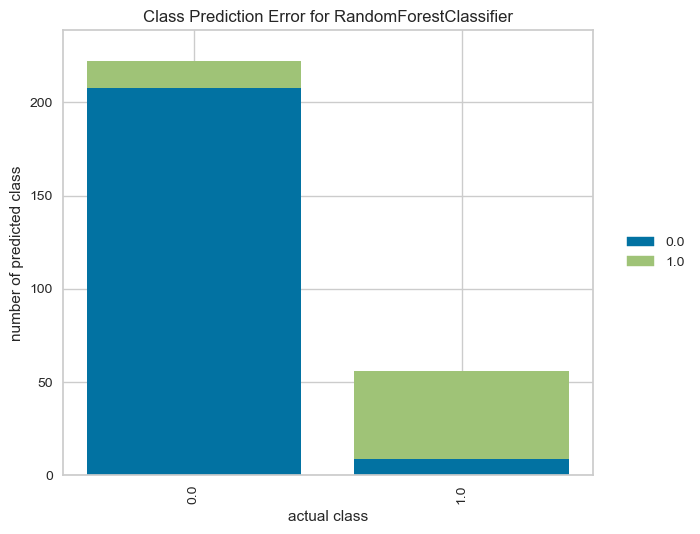

In [58]:
# Comparar predições e resultados do banco de teste
plot_model(model, plot='error')

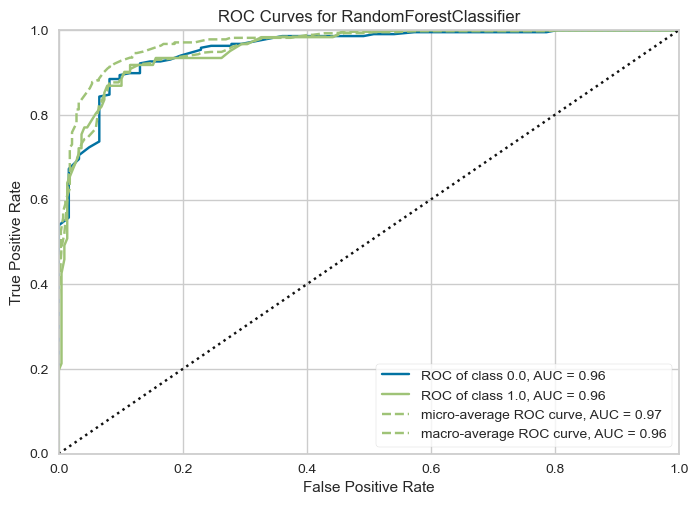

In [59]:
# Ajuste ROC
plot_model(model, plot='auc')

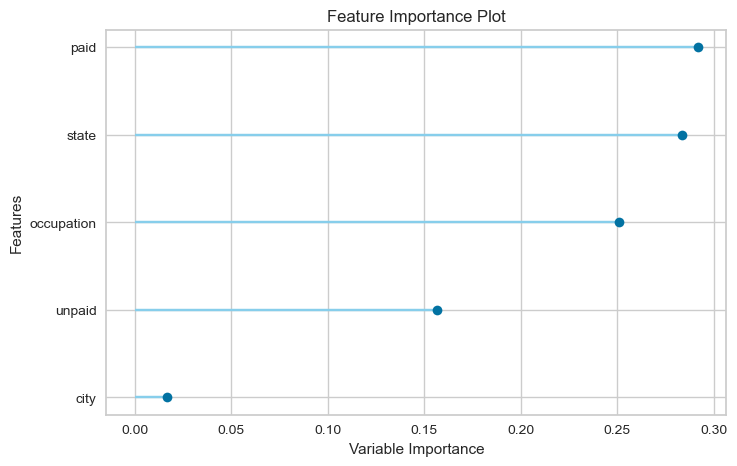

In [60]:
plot_model(model, 'feature')

#### Salvar o modelo

- ##### Efetuar predição sobre os dados sem classificação em level

In [61]:
mdl_rf = predict_model(model, data=df_test)

In [62]:
mdl_rf

,occupation,state,city,paid,unpaid,prediction_label,prediction_score
0,0.047619,0.075377,0.220679,64.0,79.0,0,0.99
1,0.047619,0.182927,0.220679,167.0,42.0,0,1.00
2,0.068027,0.386792,0.220679,350.0,385.0,0,1.00
3,0.432432,0.533333,0.220679,482.0,190.0,0,0.73
4,0.160584,0.075377,0.220679,128.0,75.0,0,1.00
...,...,...,...,...,...,...,...
98,0.439024,0.000000,0.220679,27.0,9.0,0,0.96
99,0.068027,0.075377,0.220679,0.0,0.0,0,1.00
100,0.047619,0.075377,0.220679,11.0,10.0,0,0.88
101,0.529412,0.533333,0.220679,2.0,6.0,1,0.78


In [63]:
df_test.reset_index(drop=True, inplace=True)

In [64]:
df_test['fraud'] = mdl_rf.prediction_label.astype(int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   account_number  103 non-null    object
 1   occupation      103 non-null    object
 2   state           103 non-null    object
 3   city            103 non-null    object
 4   paid            103 non-null    int32 
 5   unpaid          103 non-null    int32 
 6   fraud           103 non-null    int32 
dtypes: int32(3), object(4)
memory usage: 4.6+ KB


- ##### Visualizando qtd de previsoes as classes

<AxesSubplot:>

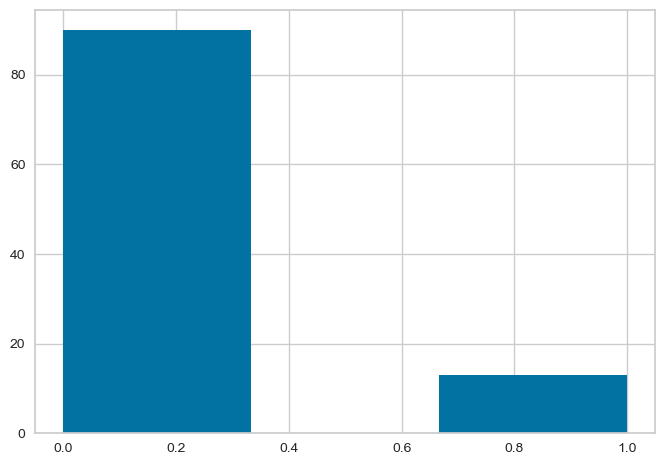

In [65]:
mdl_rf.prediction_label.hist(bins=3)

In [66]:
mdl_rf.prediction_label.value_counts()

0    90
1    13
Name: prediction_label, dtype: int64

In [67]:
# Finalize model
final_rf = finalize_model(rf_tuned)

- ##### Salvando o modelo para usar no Deploy com API Flask

In [68]:
# Save Model
save_model(final_rf, 'my_rf_pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\Fabio\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['paid', 'unpaid'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     incl...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='gini',
                                

### 4. DEPLOY - Disponibilizar a classificação obtida pelo modelo das contas presentes no banco que não possuem classificação na tabela levels, em duas formas de Deply:
   - #### Opção 1 - Deploy com API Flask.
   - #### Opção 2 - Deploy com arquivo CSV [account_number e fraud].

- ##### Deploy Opção 2 - CSV
    - ##### Gerar um csv com as colunas account_number e fraud. Sendo que a coluna fraud deve ter os seguintes valores: 0 para contas lícitas e 1 para ilícitas

In [69]:
# Filtrando apenas as colunas desejadas a coluna fraud esta preencgida pelo model_pedict()
df_test[['account_number','fraud']].to_csv("deploy.csv", index=False)

- #### Gerando um JSON dos dados não classificados para Deploy na API Flask
    - #### Opção 1: Deploy de uma API que disponibiliza um endpoit GET que recebe como parâmetro na URL o número da conta e retorna o valor 0 para conta que o modelo considere lícita e 1 caso o modelo considere ilícita. A rota deve seguir a seguinte estrutura: URL/?account_number=12345
    - #### Exemplo do endpoint da API http://localhost:5000/?account_number=309054, o arquivo da API Flask esta com nome->app.py para execupar basta utilizar o cmd do conda por exemplo e digitar python app.py

In [70]:
data = df_test.drop(columns=['fraud'])
data.to_json('data.json',orient= 'records', index=True)

#### Bibliotecas necessarias para API

In [71]:
#!pip install Flask
#!pip install uvicorn
#!pip install pickle5
#!pip install pydantic
#!pip install scikit-learn
#!pip install requests
#!pip install pypi-json
#!pip install joblib
#!pip install json